In [ ]:
pip install pandas maplotlib seaborn
conda install scipy

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
data_path = "D:/MTECH/MTECH SEM4/fin_eng/stock_data"

csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

data_df=[]

for file in csv_files:
    stock_data_file=os.path.join(data_path,file)
    df=pd.read_csv(stock_data_file)
    data_df.append(df)

display(data_df)

merged_df = pd.concat(data_df, ignore_index=False)
merged_df_path=os.path.join(data_path,"STOCK_DATA.csv")
merged_df.to_csv(merged_df_path,index=False,mode="w")



[            Date      Symbol Series  Prev Close    Open     High     Low  \
 0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
 1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
 2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
 3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
 4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
 ...          ...         ...    ...         ...     ...      ...     ...   
 3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
 3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
 3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
 3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
 3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   
 
        Last   Close    VWAP    Volume      Turnover    Trades  \
 0     9

# UNDERSTANDING THE DATA 

In [5]:
df=pd.read_csv("D:/MTECH/MTECH SEM4/fin_eng/stock_data/STOCK_DATA.csv")
df.head(),df.columns

(         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
 0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
 1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
 2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
 3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
 4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   
 
     Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
 0  962.90  984.72  27294366  2.687719e+15     NaN           9859619.0   
 1  893.90  941.38   4581338  4.312765e+14     NaN           1453278.0   
 2  884.20  888.09   5124121  4.550658e+14     NaN           1069678.0   
 3  921.55  929.17   4609762  4.283257e+14     NaN           1260913.0   
 4  969.30  965.65   2977470  2.875200e+14     NaN            816123.0   
 
    %Deliverble  
 0       0.3612  
 1       0.3172  
 2       0.2088  


## 2. LAST 2 YEAR STOCK DATA OF 10 STOCKS

In [ ]:
L2_open_close_data_path="D:/MTECH/MTECH SEM4/fin_eng/stock_data/Last_2_yrs_data.csv"
max_date = df['Date'].max()
# print(max_date) 
two_years_ago = '2019-01-01'
filtered_df = df[df['Date'] > two_years_ago]

last_2_yrs_data = filtered_df[['Date', 'Symbol', 'Open', 'Close']]
last_2_yrs_data.to_csv(L2_open_close_data_path,mode='w', index=False)

In [10]:
display(last_2_yrs_data)

,Date,Symbol,Open,Close
2746,2019-01-02,ADANIPORTS,388.00,381.30
2747,2019-01-03,ADANIPORTS,382.40,378.10
2748,2019-01-04,ADANIPORTS,378.65,382.15
2749,2019-01-07,ADANIPORTS,385.00,381.65
2750,2019-01-08,ADANIPORTS,383.00,378.75
...,...,...,...,...
45192,2021-04-26,VEDL,229.60,236.65
45193,2021-04-27,VEDL,239.75,243.35
45194,2021-04-28,VEDL,243.15,243.90
45195,2021-04-29,VEDL,245.75,255.05


## 3. YEARLY OPEN AND CLOSE PRICE FOR EACH STOCK

In [12]:
def get_yearly_open_close(group):
    return pd.DataFrame({
        'Year': [group['Date'].dt.year.iloc[0]],
        'Opening Price': [group.loc[group['Date'].idxmin(), 'Open']],
        'Closing Price': [group.loc[group['Date'].idxmax(), 'Close']]
    })

In [16]:
yearly_prices = last_2_yrs_data.groupby(['Symbol', last_2_yrs_data['Date'].dt.year]).apply(get_yearly_open_close).reset_index(drop=False)
yearly_prices = yearly_prices[['Symbol', 'Year', 'Opening Price', 'Closing Price']]
yearly_price_datapath="D:/MTECH/MTECH SEM4/fin_eng/stock_data/yearly_price.csv"
display(yearly_prices)
yearly_prices.to_csv(yearly_price_datapath,mode='w',index=False)

C:\Users\soura\AppData\Local\Temp\ipykernel_34884\408192121.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_prices = last_2_yrs_data.groupby(['Symbol', last_2_yrs_data['Date'].dt.year]).apply(get_yearly_open_close).reset_index(drop=False)


,Symbol,Year,Opening Price,Closing Price
0,ADANIPORTS,2019,388.00,366.00
1,ADANIPORTS,2020,368.00,483.75
2,ADANIPORTS,2021,485.00,730.05
3,COALINDIA,2019,240.90,211.35
4,COALINDIA,2020,211.35,135.45
5,COALINDIA,2021,135.40,133.05
6,DRREDDY,2019,2606.00,2874.55
7,DRREDDY,2020,2880.00,5205.10
8,DRREDDY,2021,5217.25,5163.10
9,EICHERMOT,2019,22340.00,22515.25


## YEARLY OPEN & CLOSE PRICES

In [22]:
df = yearly_prices.sort_values(by=['Symbol', 'Year'])
df['Return'] = df.groupby('Symbol')['Closing Price'].pct_change()
df = df.dropna()
datapath="D:/MTECH/MTECH SEM4/fin_eng/stock_data/yearly_open_close_price.csv"
df.to_csv(datapath,mode='w',index=False)
display(df)

,Symbol,Year,Opening Price,Closing Price,Return
1,ADANIPORTS,2020,368.00,483.75,0.321721
2,ADANIPORTS,2021,485.00,730.05,0.509147
4,COALINDIA,2020,211.35,135.45,-0.359120
5,COALINDIA,2021,135.40,133.05,-0.017719
7,DRREDDY,2020,2880.00,5205.10,0.810753
8,DRREDDY,2021,5217.25,5163.10,-0.008069
10,EICHERMOT,2020,22515.25,2530.90,-0.887592
11,EICHERMOT,2021,2531.00,2421.65,-0.043166
13,HEROMOTOCO,2020,2454.90,3110.00,0.272999
14,HEROMOTOCO,2021,3115.00,2819.15,-0.093521


## 4.Draw the time graph and Histogram of returns of each individual asset. Obtain the measures of descriptive statistics

## TIME GRAPH

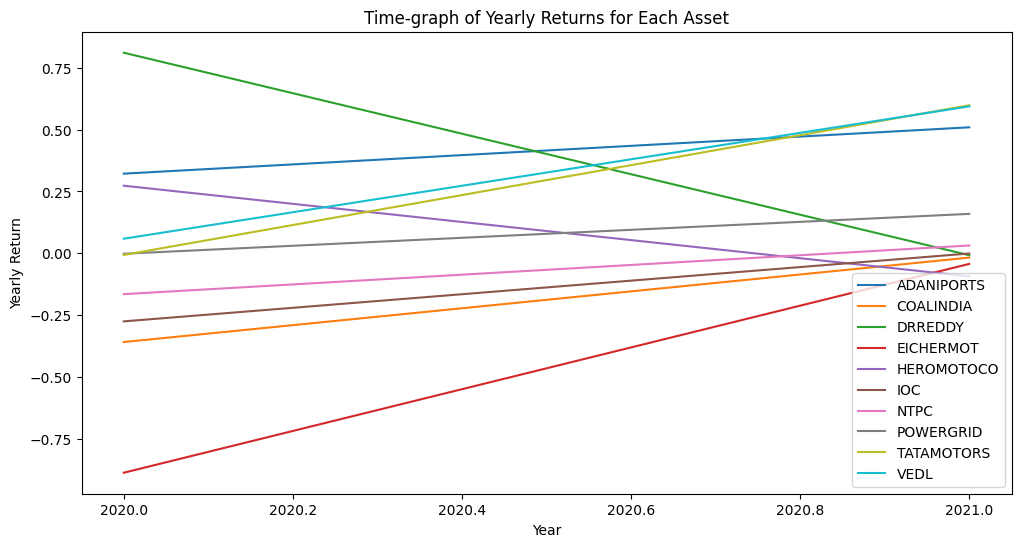

In [36]:
plt.figure(figsize=(12, 6))
for symbol in df['Symbol'].unique():
    subset = df[df['Symbol'] == symbol]
    plt.plot(subset['Year'], subset['Return'], label=symbol)

plt.xlabel("Year")
plt.ylabel("Yearly Return")
plt.title("Time-graph of Yearly Returns for Each Asset")
plt.legend()
plt.show()

## HISTOGRAM OF RETURNS FOR THE STOCKS

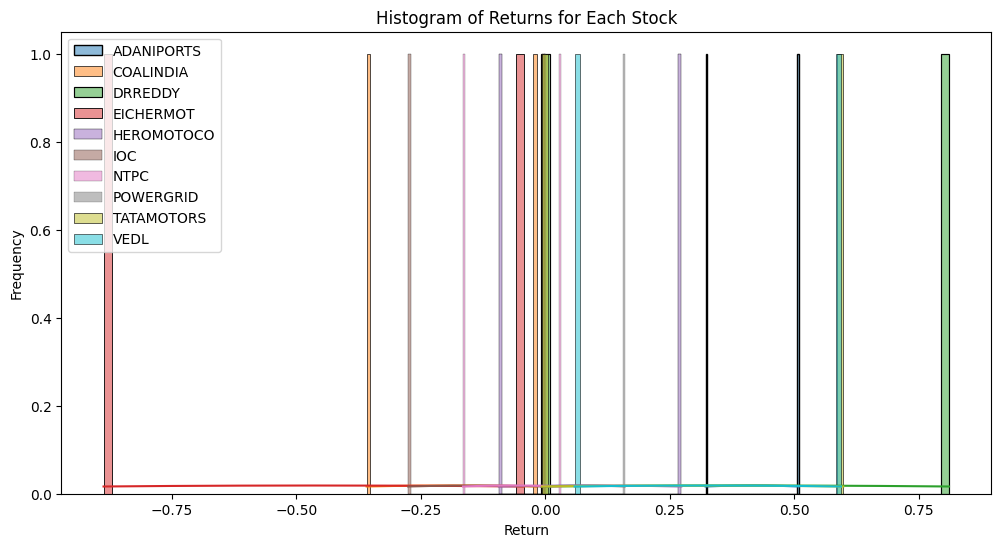

In [37]:
plt.figure(figsize=(12, 6))
for symbol in df['Symbol'].unique():
    sns.histplot(df[df['Symbol'] == symbol]['Return'], kde=True, bins=50, label=symbol, alpha=.5)

plt.xlabel("Return")
plt.ylabel("Frequency")
plt.title("Histogram of Returns for Each Stock")
plt.legend()
plt.show()

## MEASURE OF DESCRIPTIVE STATISTICS

In [38]:
stats_df = df.groupby('Symbol')['Return'].describe().T
stats_df.loc['Skewness'] = df.groupby('Symbol')['Return'].skew()
stats_df.loc['Kurtosis'] = df.groupby('Symbol')['Return'].apply(lambda x: kurtosis(x))
display(stats_df)

Symbol,ADANIPORTS,COALINDIA,DRREDDY,EICHERMOT,HEROMOTOCO,IOC,NTPC,POWERGRID,TATAMOTORS,VEDL
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.415434,-0.188419,0.401342,-0.465379,0.089739,-0.138343,-0.067137,0.078485,0.295646,0.326287
std,0.132530,0.241407,0.578995,0.597099,0.259169,0.194092,0.139073,0.113968,0.428037,0.378414
min,0.321721,-0.359120,-0.008069,-0.887592,-0.093521,-0.275587,-0.165477,-0.002102,-0.007021,0.058708
25%,0.368578,-0.273770,0.196636,-0.676485,-0.001891,-0.206965,-0.116307,0.038191,0.144312,0.192497
50%,0.415434,-0.188419,0.401342,-0.465379,0.089739,-0.138343,-0.067137,0.078485,0.295646,0.326287
75%,0.462291,-0.103069,0.606047,-0.254273,0.181369,-0.069721,-0.017967,0.118779,0.446980,0.460077
max,0.509147,-0.017719,0.810753,-0.043166,0.272999,-0.001100,0.031203,0.159073,0.598314,0.593866
Skewness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kurtosis,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000


## 5. CORRELATION ANALYSIS OF RETURNS


Correlation Matrix of Returns:
Symbol      ADANIPORTS  COALINDIA   DRREDDY  EICHERMOT  HEROMOTOCO       IOC  \
Symbol                                                                         
ADANIPORTS    1.000000   0.949159  0.974758   0.858976    0.981721  0.959536   
COALINDIA     0.949159   1.000000  0.960696   0.971466    0.990947  0.999229   
DRREDDY       0.974758   0.960696  1.000000   0.917660    0.984010  0.963693   
EICHERMOT     0.858976   0.971466  0.917660   1.000000    0.940339  0.961465   
HEROMOTOCO    0.981721   0.990947  0.984010   0.940339    1.000000  0.994271   
IOC           0.959536   0.999229  0.963693   0.961465    0.994271  1.000000   
NTPC          0.971400   0.995881  0.966335   0.946206    0.996615  0.998669   
POWERGRID     0.986713   0.986429  0.972756   0.921617    0.997347  0.991940   
TATAMOTORS    0.984292   0.974655  0.997278   0.924525    0.994116  0.978455   
VEDL          0.989536   0.971363  0.995718   0.913557    0.993741  0.976434   

Symbol 

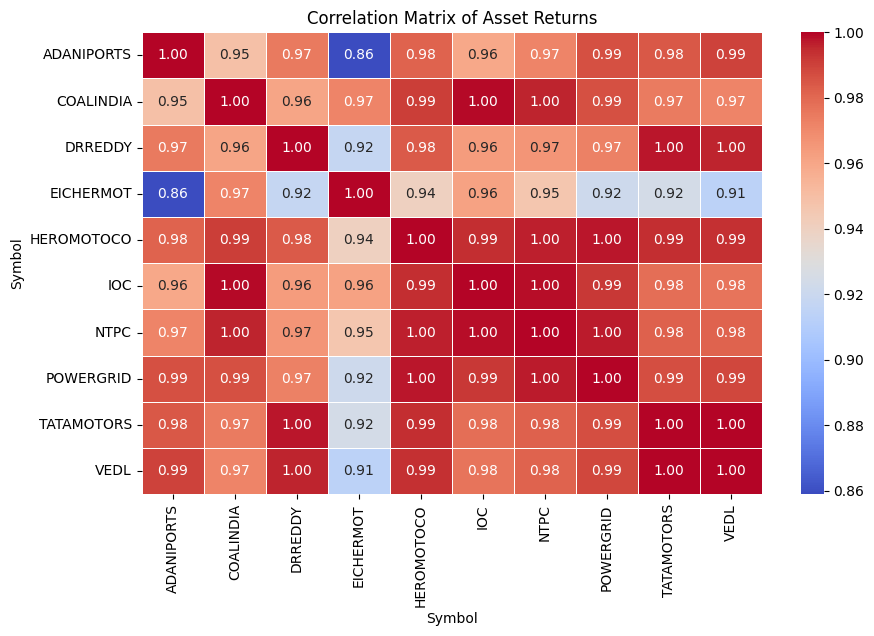

In [ ]:
correlation_matrix = stats_df.corr()
print("\nCorrelation Matrix of Returns:")
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Asset Returns")
plt.show()

## POINTERS: 
1. Adani ports and DrReddy has almost .97 cr : meaning the value changes linearly. The return is linearly correlated between adaniports and dr reddy.
2. When ADANIPORTS’s return increases, DRREDDY’s return tends to increase by a similar magnitude, and vice versa.
3. +1 means a perfect positive linear relationship: as one variable increases, the other always increases proportionally.
4. -1 means a perfect negative linear relationship: as one variable increases, the other always decreases proportionally.

Symbol  ADANIPORTS  COALINDIA   DRREDDY  EICHERMOT  HEROMOTOCO     IOC  \
Year                                                                     
2020      1.000000   1.000000  1.000000   1.000000    1.000000  1.0000   
2021      1.509147   0.982281  0.991931   0.956834    0.906479  0.9989   

Symbol      NTPC  POWERGRID  TATAMOTORS      VEDL  
Year                                               
2020    1.000000   1.000000    1.000000  1.000000  
2021    1.031203   1.159073    1.598314  1.593866  

Weights:
Symbol
ADANIPORTS    0.1
COALINDIA     0.1
DRREDDY       0.1
EICHERMOT     0.1
HEROMOTOCO    0.1
IOC           0.1
NTPC          0.1
POWERGRID     0.1
TATAMOTORS    0.1
VEDL          0.1
dtype: float64

Combined Index:
Year
2020    100.000000
2021    117.280285
dtype: float64


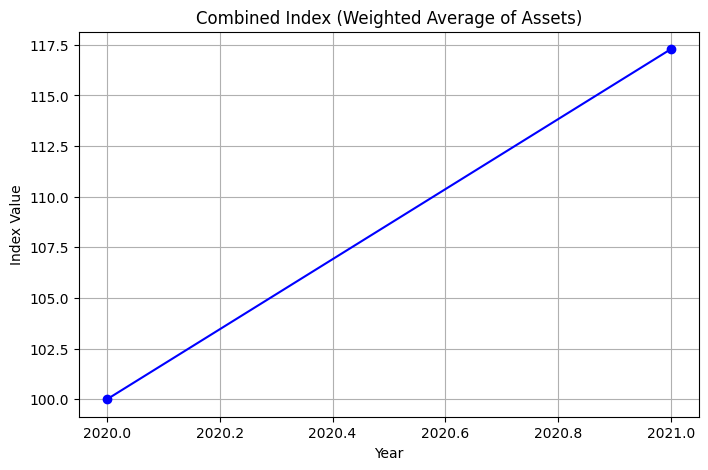

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:/MTECH/MTECH SEM4/fin_eng/stock_data/yearly_open_close_price.csv"
df = pd.read_csv(file_path, skipinitialspace=True)
# print(df.head())

price_pivot = df.pivot(index='Year', columns='Symbol', values='Closing Price')

price_pivot = price_pivot.sort_index()
# print(price_pivot)

# Normalize prices for each stock by dividing by the price in the first available year
normalized_prices = price_pivot / price_pivot.iloc[0]
print(normalized_prices)

# Define weights for each stock. For equal weighting, each stock gets 1/(number of stocks)
weights = pd.Series(1 / len(normalized_prices.columns), index=normalized_prices.columns)
print("\nWeights:")
print(weights)

# Compute the combined index as the weighted average of the normalized prices
# Multiply normalized prices by weights and sum across stocks, then scale (base 100)
combined_index = normalized_prices.mul(weights, axis=1).sum(axis=1) * 100
print("\nCombined Index:")
print(combined_index)

plt.figure(figsize=(8, 5))
plt.plot(combined_index.index, combined_index, marker='o', linestyle='-', color='blue')
plt.title("Combined Index (Weighted Average of Assets)")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.grid(True)
plt.show()


## COMBINED INDEX : The weighted average of normalized closing prices.

pi(t) closing price of stock i at time t
pi(t0) closing price of stock i at time t0 or first year
wi weight for stock i

then,
normalized price at time t for stock i=> npi(t)=pi(t)/pi(t0)
weighted avg= wi* npi(t) for i to N , where N is number of stocks
combined index at time t => 100 * wi * pi(t)/pi(t0)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Replace with the actual path to your stock asset CSV file
file_path = "D:/MTECH/MTECH SEM4/fin_eng/stock_data/STOCK_DATA.csv"

# Read the CSV file
df = pd.read_csv(file_path, skipinitialspace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# (Optional) Sort the DataFrame by date
df = df.sort_values(by='Date')

# Pivot the data so that each column is the Close price for a stock
# Rows represent dates and columns represent stock symbols
price_df = df.pivot(index='Date', columns='Symbol', values='Close')

# Calculate daily returns: percentage change of closing prices
returns_df = price_df.pct_change().dropna()

# For debugging, display the first few rows of returns
print("Daily Returns (first 5 rows):")
print(returns_df.head())


Daily Returns (first 5 rows):
Symbol      ADANIPORTS  COALINDIA   DRREDDY  EICHERMOT  HEROHONDA  HEROMOTOCO  \
Date                                                                            
2015-05-08    0.038104   0.008038  0.020576   0.065793        0.0   -0.022892   
2015-05-11    0.026708   0.022684  0.002761   0.069098        0.0    0.036338   
2015-05-12   -0.026595  -0.007393  0.032503   0.017008        0.0    0.034455   
2015-05-13    0.016572  -0.000677  0.007279   0.054259        0.0    0.015144   
2015-05-14   -0.019092   0.003388  0.007226   0.004787        0.0    0.013480   

Symbol           IOC  MUNDRAPORT      NTPC  POWERGRID  SESAGOA  SSLT  \
Date                                                                   
2015-05-08  0.013601         0.0 -0.003509  -0.002138      0.0   0.0   
2015-05-11  0.010735         0.0  0.020775   0.021429      0.0   0.0   
2015-05-12 -0.019472         0.0 -0.022766  -0.025874      0.0   0.0   
2015-05-13  0.007974         0.0 -0.022944

C:\Users\soura\AppData\Local\Temp\ipykernel_34884\3126665061.py:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = price_df.pct_change().dropna()


In [50]:
# Calculate mean daily returns and annualize them (assuming 252 trading days per year)
mean_daily_returns = returns_df.mean()
annual_returns = mean_daily_returns * 252

# Calculate the covariance matrix of daily returns and annualize it
cov_daily = returns_df.cov()
annual_cov = cov_daily * 252

print("\nAnnual Expected Returns:")
print(annual_returns)

print("\nAnnual Covariance Matrix:")
print(annual_cov)



Annual Expected Returns:
Symbol
ADANIPORTS    0.206963
COALINDIA    -0.125430
DRREDDY       0.121187
EICHERMOT    -0.010710
HEROHONDA     0.000000
HEROMOTOCO    0.075032
IOC          -0.099104
MUNDRAPORT    0.000000
NTPC         -0.019310
POWERGRID     0.107260
SESAGOA       0.000000
SSLT          0.000000
TATAMOTORS    0.020623
TELCO         0.000000
VEDL          0.141327
dtype: float64

Annual Covariance Matrix:
Symbol      ADANIPORTS  COALINDIA   DRREDDY  EICHERMOT  HEROHONDA  HEROMOTOCO  \
Symbol                                                                          
ADANIPORTS    0.135336   0.030441  0.019613   0.042266        0.0    0.033322   
COALINDIA     0.030441   0.088225  0.014970   0.026119        0.0    0.022553   
DRREDDY       0.019613   0.014970  0.088362   0.014106        0.0    0.016962   
EICHERMOT     0.042266   0.026119  0.014106   0.256332        0.0    0.044466   
HEROHONDA     0.000000   0.000000  0.000000   0.000000        0.0    0.000000   
HEROMOTOCO   

In [51]:
def portfolio_return(weights, returns):
    """Calculate the portfolio return given weights and asset returns (annualized)."""
    return np.dot(weights, returns)

def portfolio_volatility(weights, cov_matrix):
    """Calculate the portfolio volatility given weights and covariance matrix (annualized)."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))


## Compute the Efficient Frontier (Markowitz Curve)
1. For a range of target returns, we minimize portfolio volatility

In [52]:
# Number of assets
n_assets = len(annual_returns)

# Constraints: Sum of weights equals 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: no short-selling allowed (weights between 0 and 1)
bounds = tuple((0, 1) for _ in range(n_assets))

# Create a range of target returns (from the minimum to maximum annual return)
target_returns = np.linspace(annual_returns.min(), annual_returns.max(), 50)
efficient_vols = []

def minimize_volatility(weights, cov_matrix):
    """Objective function: portfolio volatility"""
    return portfolio_volatility(weights, cov_matrix)

def get_min_volatility_portfolio(target, returns, cov_matrix):
    """Find the portfolio with the minimum volatility for a given target return."""
    # Add the target return constraint
    constraints_target = (
        constraints,
        {'type': 'eq', 'fun': lambda w: portfolio_return(w, returns) - target}
    )
    initial_guess = np.repeat(1/n_assets, n_assets)
    result = minimize(minimize_volatility, initial_guess,
                      args=(cov_matrix,), method='SLSQP',
                      bounds=bounds, constraints=constraints_target)
    return result

# Loop through target returns and compute the efficient frontier
for target in target_returns:
    res = get_min_volatility_portfolio(target, annual_returns.values, annual_cov.values)
    if res.success:
        efficient_vols.append(portfolio_volatility(res.x, annual_cov.values))
    else:
        efficient_vols.append(np.nan)

efficient_vols = np.array(efficient_vols)


## Compute the Tangency Portfolio (Maximum Sharpe Ratio Portfolio)

In [53]:
# Define risk-free rate (annual)
rf = 0.03

def negative_sharpe_ratio(weights, returns, cov_matrix, rf):
    ret = portfolio_return(weights, returns)
    vol = portfolio_volatility(weights, cov_matrix)
    # Negative Sharpe ratio (to maximize Sharpe, we minimize its negative)
    return - (ret - rf) / vol

initial_guess = np.repeat(1/n_assets, n_assets)
tangency_result = minimize(negative_sharpe_ratio, initial_guess,
                           args=(annual_returns.values, annual_cov.values, rf),
                           method='SLSQP', bounds=bounds, constraints=constraints)

w_tan = tangency_result.x
tan_return = portfolio_return(w_tan, annual_returns.values)
tan_vol = portfolio_volatility(w_tan, annual_cov.values)
tan_sharpe = (tan_return - rf) / tan_vol

print("\nTangency Portfolio Weights:")
print(dict(zip(annual_returns.index, np.round(w_tan, 4))))
print("Tangency Portfolio Return: {:.4f}, Volatility: {:.4f}, Sharpe Ratio: {:.4f}".format(tan_return, tan_vol, tan_sharpe))



Tangency Portfolio Weights:
{'ADANIPORTS': np.float64(0.4202), 'COALINDIA': np.float64(0.0), 'DRREDDY': np.float64(0.2779), 'EICHERMOT': np.float64(0.0), 'HEROHONDA': np.float64(0.0), 'HEROMOTOCO': np.float64(0.0), 'IOC': np.float64(0.0), 'MUNDRAPORT': np.float64(0.0), 'NTPC': np.float64(0.0), 'POWERGRID': np.float64(0.3019), 'SESAGOA': np.float64(0.0), 'SSLT': np.float64(0.0), 'TATAMOTORS': np.float64(0.0), 'TELCO': np.float64(0.0), 'VEDL': np.float64(0.0)}
Tangency Portfolio Return: 0.1530, Volatility: 0.2188, Sharpe Ratio: 0.5623


## Plot the Markowitz Efficient Frontier and the Capital Market Line (CML)

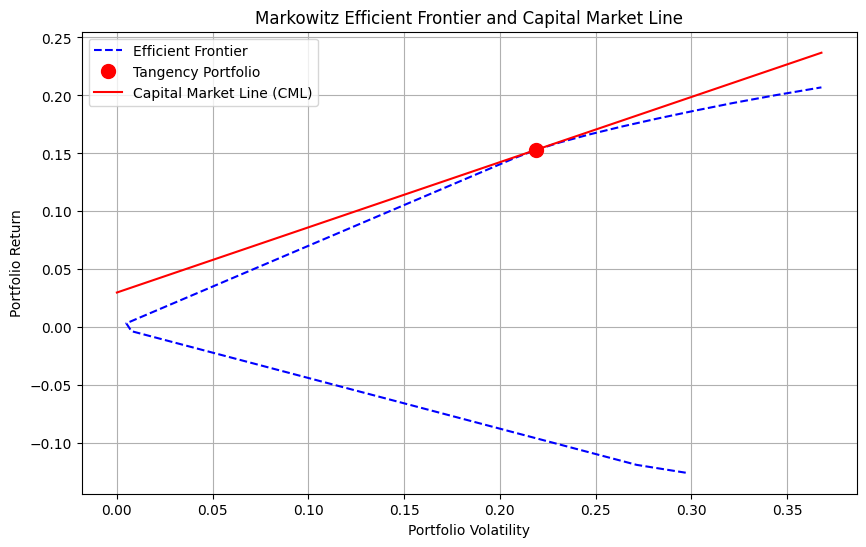

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(efficient_vols, target_returns, 'b--', label='Efficient Frontier')
plt.plot(tan_vol, tan_return, 'ro', markersize=10, label='Tangency Portfolio')

# Capital Market Line: from (0, rf) through the tangency portfolio
sigma_range = np.linspace(0, efficient_vols.max(), 100)
CML = rf + tan_sharpe * sigma_range
plt.plot(sigma_range, CML, 'r-', label='Capital Market Line (CML)')

plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Return")
plt.title("Markowitz Efficient Frontier and Capital Market Line")
plt.legend()
plt.grid(True)
plt.show()


## 7. Obtain the return and the risk of combined index.

Price Data (first 5 rows):
Symbol      ADANIPORTS  COALINDIA  DRREDDY  EICHERMOT  HEROHONDA  HEROMOTOCO  \
Date                                                                           
2000-01-03         NaN        NaN  1508.25      48.85    1207.60         NaN   
2000-01-04         NaN        NaN  1628.95      51.40    1199.85         NaN   
2000-01-05         NaN        NaN  1568.05      55.55    1143.80         NaN   
2000-01-06         NaN        NaN  1661.55      60.00    1161.40         NaN   
2000-01-07         NaN        NaN  1529.10      64.65    1106.55         NaN   

Symbol         IOC  MUNDRAPORT  NTPC  POWERGRID  SESAGOA  SSLT  TATAMOTORS  \
Date                                                                         
2000-01-03  270.85         NaN   NaN        NaN   116.35   NaN         NaN   
2000-01-04  264.40         NaN   NaN        NaN   114.70   NaN         NaN   
2000-01-05  261.30         NaN   NaN        NaN   114.00   NaN         NaN   
2000-01-06  260.10    

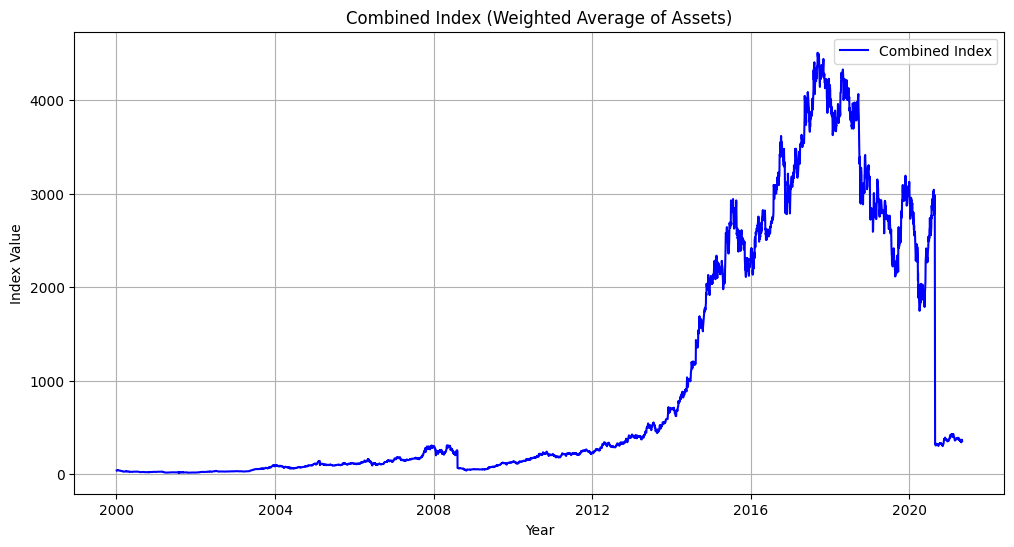

Combined Index Average Daily Return: 0.10%
Combined Index Daily Volatility (Risk): 2.79%
Combined Index Annual Return: 29.97%
Combined Index Annual Volatility (Risk): 44.34%


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Step 1: Load and Prepare the Data
# ===============================
# Replace with the actual path to your CSV file
file_path = "D:/MTECH/MTECH SEM4/fin_eng/stock_data/yearly_open_close_price.csv"

df = pd.read_csv(file_path, skipinitialspace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%m-%d', errors='coerce')
df = df.sort_values(by='Year')
# price_df = df.pivot(index='Year', columns='Symbol', values='Closing Price')
price_df = price_df.sort_index()  # Ensure dates are in order

print("Price Data (first 5 rows):")
print(price_df.head())

weights = pd.Series(1 / len(price_df.columns), index=price_df.columns)
normalized_prices = price_df / price_df.iloc[0]
combined_index = normalized_prices.mul(weights, axis=1).sum(axis=1) * 100

# Plot the Combined Index
plt.figure(figsize=(12, 6))
plt.plot(combined_index.index, combined_index, label='Combined Index', color='blue')
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.title("Combined Index (Weighted Average of Assets)")
plt.legend()
plt.grid(True)
plt.show()

# Compute Returns and Risk
# Calculate daily returns of the combined index as the percentage change
combined_index_returns = combined_index.pct_change().dropna()

# Compute average daily return and daily volatility (standard deviation)
avg_daily_return = combined_index_returns.mean()
daily_volatility = combined_index_returns.std()

trading_days = 252
annual_return = (1 + avg_daily_return) ** trading_days - 1
annual_volatility = daily_volatility * np.sqrt(trading_days)

print("Combined Index Average Daily Return: {:.2%}".format(avg_daily_return))
print("Combined Index Daily Volatility (Risk): {:.2%}".format(daily_volatility))
print("Combined Index Annual Return: {:.2%}".format(annual_return))
print("Combined Index Annual Volatility (Risk): {:.2%}".format(annual_volatility))
